# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Leo Mensler

Datum: 11.11.23

Gruppe: 79

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Berechnen der Wärmekapazität eines Behälters. Ermitteln der erforderlichen Messdaten mithilfe zweier Temperatursensoren. Verarbeitung der Daten mithilfe eines RaspberryPi-Computer unter einhalten der FAIR-Datenprinzipien. 

## Versuchsaufbau und Durchführung

Versuchsaufbau:

Ich habe die beiden Temperatursensoren gemäß der Aufgabenstellung über die Wago-Klemmen mit meinem Raspberry Pi verbunden. 
Diesen wiederum habe ich an meinem Laptop angeschlossen um die gemessenen Daten evraarbeiten zu können. 
Zu Beginn habe ich je einen Temperatursensor in eine Tasse gehalten und die Tassen mit je 150ml Wasser befüllt. 
Dabei hat das Wasser in der einen Tasse Raumtemperatur und in der anderen Tasse ca 40°C.
Da die Temperaturmessung als solches eher träge ist, habe ich einem moment gewartet bis die Sensoren die Ist-Temperatur der jeweiligen Flüssigkeit aneigen und die Messung dann an meinem Laptop gestartet. Danach habe ich flüßigkeit von der heißen in die kalte Tasse gegeben und den sonsor der heißen Tasse mit in die ursprünglich nur mit zimmertemperaturwarmen Wasser gefüllten Tasse gegeben. Nach einiger Zeit habe ich die Messung beendet.


<img src="figures/heat_capacity.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

path = "./data/data_heat_capacity/data_heat_capacity.h5"

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.

#Importieren der HDF% Bibliothek
import h5py as h5

with h5.File(path) as f:
    authors = f.attrs["authors"]
    created = f.attrs["created"]
    experiment = f.attrs["experiment"]
    group_number = f.attrs["group_number"]
    
    #Nun greife ich auf die einzelnen Untergruppen meiner HDF5 Datei zu
    raw_data = f["RawData"]
    
    #Nun kann ich die Sensor UUIDs als Liste auslesen
    sensor_ids = list(raw_data.keys())
        
    sensor_hot = raw_data[sensor_ids[0]]
    sensor_cold = raw_data[sensor_ids[1]]
      
    #Auslesen der Temperatur der jeweiligen Sensoren als Liste
    temperature_hot = list(sensor_hot["temperature"])
    temperature_cold = list(sensor_cold["temperature"])
    
    #Auslesen des Timestamps als Liste
    time_sensor_hot = list(sensor_hot["timestamp"])
    time_sensor_cold = list(sensor_cold["timestamp"])
    
# DONE #

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


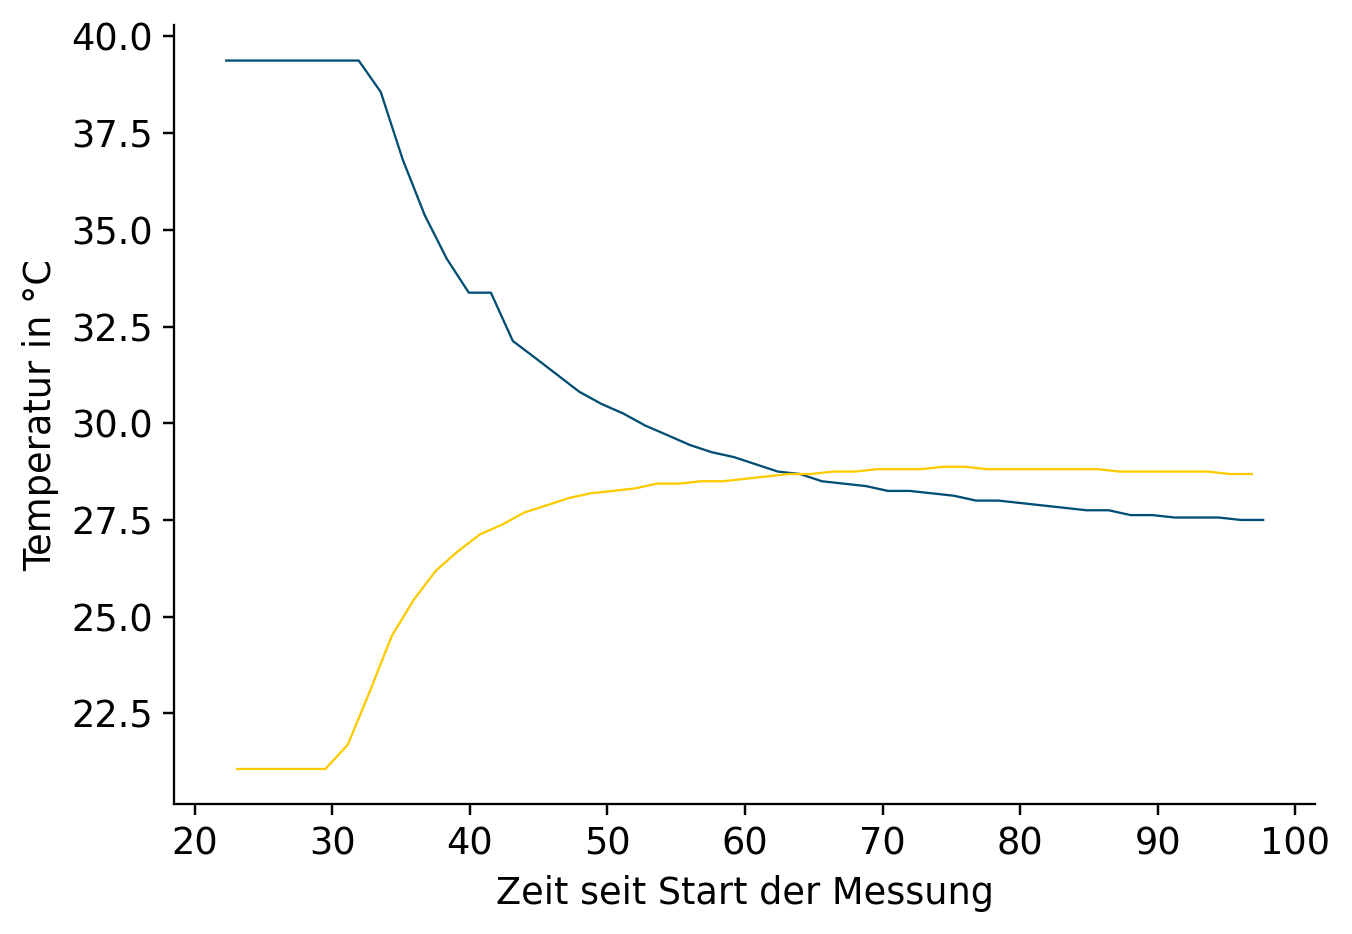

In [4]:
# TODO: Use the temperature and time data for plotting

import matplotlib.pyplot as plt

plt.plot(time_sensor_hot,temperature_hot)
plt.plot(time_sensor_cold,temperature_cold)

plt.xlabel("Zeit seit Start der Messung")
plt.ylabel("Temperatur in °C")
plt.show()
# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [32]:
# Heat capacity of Water
c_w = 4.18

import json 
# TODO: Read mass from the metadata of the experiment.

#Ich lese die Masse des Wassers in meinem beiden Tassen aus. 
with open("./datasheets/probe_heat_capacity.json") as f:
    experiment_metadata = json.load(f)["probe"] 
    mass_hot_cup =  experiment_metadata["mass_hot_cup"]
    mass_cold_cup =  experiment_metadata["mass_cold_cup"] 
print(mass_hot_cup)

# DONE #

150


#### (iV) Anfangs- und Endwert der Temperatur

In [34]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#Anzahl der Einträge 
i = len(temperature_hot)
k = len(temperature_cold)

temperature_hot_cup_start = temperature_hot[0]
temperature_cold_cup_start = temperature_cold[0]
temperature_hot_cup_end = temperature_hot[i-1]
temperature_cold_cup_end = temperature_cold[k-1]



print(temperature_hot_cup_end)
# DONE #

28.09375


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [37]:
# TODO: Calculate heat capacity of the calorimeter
#Ich nenne meine Variablen nun anders um die Formel eins zu eins so berechnen zu können
import numpy as np

m_add = int(mass_hot_cup)
m_add = m_add/1000 #umrechnung in kg
m_cup = int(mass_cold_cup)
m_cup = m_cup/1000 #umrechnung in kg
T2 = temperature_hot_cup_start
T1 = temperature_cold_cup_start

# Um T_M zu bestimmen interpoliere ich die beiden Endtemperaturen meiner Sensoren
T_M = (temperature_hot_cup_end+temperature_cold_cup_end)/2

#Nun berechne ich C
C = c_w * m_add * (T2 - T_M) / (T_M - T1) - c_w * m_cup
# DONE #

150


#### (Vi) Ergebnis

In [39]:
# TODO: Print result

print ("Die berechnete heat capacity vom Kalorimeter ist",C,"kJ/K")

# DONE #

Die berechnete heat capacity vom Kalorimeter ist 0.37898666666666647 kJ/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Messergebnisse sind erfreulich. Die Daten decken sich mit den Erwartzungen. Die Hypothese, dass zwei gemischte Fluide nach dem 0ten Hauptsatz der Thermodynamik nach einiger Zeit die selbe Temperatur annehmen kann bestätigt werden. Wichtig dabei ist zu erwähnen, dass die Abweichung die man in dem Graph sehen kann auf die sensorspezifische minimale Auflösung zurückzuführen ist.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

In diesem Versuch konnte ich einige neue Sachen lernen:
    
Umgang mit dem RaspberryPi:

    - Ich habe die Software VNCViewer kennengelernt
    - Ich habe das erste Mal Sensoren selbt ausgelesen und diese Daten verarbeitet
    
Python:

    - Ich konnte meine Programmierkentnisse verbessern